In [1]:
from keras.layers import Dense, Dropout, Activation, Flatten,  Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow import keras
import datetime
now = datetime.datetime.now
import tensorflow as tf
import numpy as np   
import cv2
import os

In [2]:
path = 'myData'
pathLabels = 'labels.csv'
testRatio = 0.2
valRatio = 0.2
imageDimensions = (28, 28, 3)

In [3]:
count = 0
images = []
classNo = []

In [4]:
myList = os.listdir(path)
print(myList)
print("Total No of Classes detected:", len(myList))
noOfClasses = len(myList)
print("Importing Classes ..... ")

['0', '1', '2', '3', '4']
Total No of Classes detected: 5
Importing Classes ..... 


In [5]:
for x in range(0, noOfClasses):
    myPicList = os.listdir(path+"/"+str(x))
    for y in myPicList:
        curImg = cv2.imread(path +"/"+str(x)+"/"+y)
        #curImg = cv2.resize(curImg, (imageDimensions[0], imageDimensions[1]))
        images.append(curImg)
        classNo.append(x)
    print(x, end = " ")
print(" ")

0 1 2 3 4  



### converted to numpy array


In [6]:
images = np.array(images)
classNo = np.array(classNo)

print(images.shape)
print(classNo.shape)
# here we have 50,  28 by 28 image with three color

(50, 28, 28, 3)
(50,)


###  Split the data

In [7]:
x_train, x_test, y_train,  y_test = train_test_split(images, classNo, test_size = testRatio)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = valRatio)

print(x_train.shape)
print(x_test.shape)
print(x_validation.shape)

(32, 28, 28, 3)
(10, 28, 28, 3)
(8, 28, 28, 3)


In [8]:
numOfSamples = []     
for x in range(0, noOfClasses):
    #print(len(np.where(y_train == x)[0]))
    numOfSamples.append(len(np.where(y_train == x)[0])) # Our "A value in the in traingsample"
print(numOfSamples)

[8, 5, 7, 5, 7]


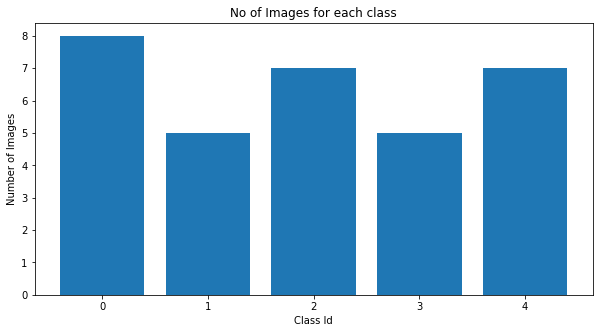

In [9]:
plt.figure(figsize = (10, 5))
plt.bar(range(0,noOfClasses), numOfSamples)
plt.title("No of Images for each class")
plt.xlabel("Class Id")
plt.ylabel("Number of Images")
plt.show()

In [16]:
def preProcessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BAYER_BG2BGR)
    img = cv2.equalizeHist(img)
    img = img/255
    return img

img = preProcessing(x_train[30])
img = cv2.resize(img,(300, 300))
cv2.imshow("preprocessing", img)
cv2.waitKey(0)

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-52oirelq\opencv\modules\imgproc\src\demosaicing.cpp:1721: error: (-215:Assertion failed) scn == 1 && (dcn == 3 || dcn == 4) in function 'cv::demosaicing'


In [11]:
#print(img)

In [15]:
#x_train = np.array(list(map(preProcessing, x_train)))
#x_test = np.array(list(map(preProcessing, x_test)))
#x_validation = np.array(list(map(preProcessing, x_validation)))



x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_validation = x_validation.reshape(x_validation.shape[0], x_validation.shape[1], x_validation.shape[2], 1)


dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)
dataGen.fit(x_train)

y_train = to_categorical(y_train, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)

def mymodel():
    noOfFilters = 60
    xizeOfFilter1 = (5, 5)
    sizeOfFilter2 = (3, 3)
    sizeOfPool = (2, 2)
    noOfNode = 500
    
    model = Sequential()
    model.add((Conv2D(noOfFilters, sizeOfFilter1, input_shape = (imageDimensions[0],imageDimensions[1], 1),avtivation = 'relu')))
    model.add((Conv2D(noOfFilters, sizeOfFilter1, avtivation = 'relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add((Conv2D(noOfFilters//2, sizeOfFilter1, avtivation = 'relu')))
    model.add((Conv2D(noOfFilters//2, sizeOfFilter2, avtivation = 'relu')))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(noOfNode, activation ='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfNode, activation ='softmax'))
    model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

model = mymodel()
print(model.summary())

ValueError: cannot reshape array of size 75264 into shape (32,28,28,1)